In [41]:
#실시간 차트

#웹 크롤링을 쉽게 해주는 BeautifulSoup
#크롤링: 웹 사이트의 HTML문서에서 필요한 정보를 수집하는 것
#스크래이핑: 실제 HTML만을 이용해 수집하는 것(크롤링의 일종)

#Anaconda 설치 시 BeautifulSoup 라이브러리가 자동으로 포함됨
from bs4 import BeautifulSoup
from urllib.request import urlopen

pg = urlopen('http://www.mnet.com/chart/TOP100/2018031514') #url의 페이지(html) 불러오기
pg2 = urlopen('http://www.mnet.com/chart/TOP100/2018031514?pNum=2')

soup = BeautifulSoup(pg, 'html.parser')
soup2 = BeautifulSoup(pg2, 'html.parser')

song_list = soup.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
song_list

song_list2 = soup2.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
song_list2

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


[<tr>
 <td class="MMLItemCheck"><input id="" name="songIdx" title="Faded - 선택" type="checkbox" value="5148577"/></td>
 <td class="MMLItemRank"><div class="MMLIRankNum_Box"><span class="MMLI_RankNum MMLI_RankNum_51">51위</span></div><td class="MMLItemUpdown"><div class="MMLIUpdown_Box"><span class="MMLI_Updown MMLI_Updown_Down">상승</span><span class="MMLI_UpdownNum">4</span></div></td></td>
 <td class="MMLItemTitle">
 <div class="MMLITitle_Wrap">
 <div class="MMLITitle_Album">
 <a href="/album/523296 " target="_self"><img alt="Faded - 앨범" onerror="javascript:mnetImage.fnSetClipUrl(this, '0202' , '523296', '50')" src="http://cmsimg.mnet.com/clipimage/album/50/000/523/523296.jpg"/><span class="photoLine"></span></a>
 </div>
 <div class="MMLITitle_Box info">
 <div class="MMLITitleSong_Box">
 <a class="MMLI_SongInfo" href="/track/5148577" target="_self">Faded - 곡정보</a><a class="MMLI_Song" href="javascript:mnetCom.aodPlay('5148577');" title="Faded 새창">Faded</a>
 </div>
 <div class="MMLITitle_I

In [42]:
mnet=[]

for song in song_list:
    
    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')
    num= song.find('td', class_='MMLItemUpdown').get_text()
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()
    
    page3 = song.find('a')['href']
    page3 = urlopen('http://www.mnet.com' + page3)
    soup3 = BeautifulSoup(page3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date
    
    
    num=num.replace('보합0','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    if num == '신규진입':
        num=0    
    if int(num) > 100 :
        num = 100
    mnet.append([int(rank), int(num), song_name, singer, album, s_date])
    
    print('순위: ', rank)
    print('등락: ', num)
    print('곡: ', song_name)
    print('가수: ', singer)
    print('앨범: ', album)
    print('발매일: ', s_date)
    print()
    
for song in song_list2:
    
    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')
    num= song.find('td', class_='MMLItemUpdown').get_text()
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()
    
    pg3 = song.find('a')['href']
    pg3 = urlopen('http://www.mnet.com' + pg3)
    soup3 = BeautifulSoup(page3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date
    
    num=num.replace('보합0','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    if num == '신규진입':
        num=0
    if int(num) > 100 :
        num = 100
    mnet.append([int(rank), int(num), song_name, singer, album, s_date])
    
    print('순위: ', rank)
    print('등락: ', num)
    print('곡: ', song_name)
    print('가수: ', singer)
    print('앨범: ', album)
    print('발매일: ', s_date)
    print()

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  1
등락:  0
곡:  꽃 길
가수:  BIGBANG
앨범:  꽃 길
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  2
등락:  0
곡:  별이 빛나는 밤
가수:  마마무(Mamamoo)
앨범:  Yellow Flower
발매일:  2018.03.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  3
등락:  1
곡:  Look
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  4
등락:  1
곡:  Jenga (Feat. Gaeko)
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  5
등락:  0
곡:  내가 더 나빠
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  6
등락:  5
곡:  사랑을 했다 (LOVE SCENARIO)
가수:  iKON
앨범:  Return
발매일:  2018.01.25



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  7
등락:  0
곡:  나타나줘 (Feat. 박재범)
가수:  로꼬
앨범:  나타나줘
발매일:  2018.03.14



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  8
등락:  2
곡:  You
가수:  멜로망스(Melomance)
앨범:  투유 프로젝트 - 슈가맨2 Part 2
발매일:  2018.01.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  9
등락:  1
곡:  My Blossom
가수:  소유(SOYOU)
앨범:  My Blossom
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  10
등락:  1
곡:  괜찮냐고 
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  11
등락:  1
곡:  뿜뿜
가수:  모모랜드(MOMOLAND)
앨범:  GREAT!
발매일:  2018.01.03



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  12
등락:  1
곡:  약속해요 (I.P.U.)
가수:  Wanna One(워너원)
앨범:  약속해요 (I.P.U.) - Special Theme Track
발매일:  2018.03.05



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  13
등락:  4
곡:  너 하나만 (Feat. 효린)
가수:  GOT7 (갓세븐)
앨범:  Eyes On You
발매일:  2018.03.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  14
등락:  0
곡:  애쓰지 마요
가수:  박보람
앨범:  애쓰지 마요
발매일:  2018.02.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  15
등락:  5
곡:  My Way
가수:  이수(엠씨더맥스) 
앨범:  돈꽃 OST Part 1
발매일:  2017.11.11



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  16
등락:  0
곡:  그때 헤어지면 돼
가수:  로이킴
앨범:  그때 헤어지면 돼
발매일:  2018.02.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  17
등락:  10
곡:  Roller Coaster
가수:  청하
앨범:  Offset
발매일:  2018.01.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  18
등락:  10
곡:  HandClap
가수:  Fitz & The Tantrums
앨범:  Fitz and The Tantrums (Deluxe)
발매일:  2017.07.28



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  19
등락:  0
곡:  잘 살길 바래 (With DAVII)
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  20
등락:  31
곡:  밤이 되니까
가수:  펀치(Punch)
앨범:  밤이 되니까
발매일:  2017.09.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  21
등락:  18
곡:  네가 없는 곳
가수:  양요섭
앨범:  YANG YOSEOP 2ND MINI ALBUM `白`
발매일:  2018.02.19



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  22
등락:  30
곡:  Bad Boy
가수:  Red Velvet (레드벨벳)
앨범:  The Perfect Red Velvet - The 2nd Album Repackage
발매일:  2018.01.29



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  23
등락:  5
곡:  후유증
가수:  민경훈
앨범:  후유증
발매일:  2018.02.17



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  24
등락:  25
곡:  선물
가수:  멜로망스(Melomance)
앨범:  Moonlight
발매일:  2017.07.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  25
등락:  4
곡:  instagram
가수:  DEAN
앨범:  instagram
발매일:  2017.12.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  26
등락:  5
곡:  MIANHAE
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  27
등락:  28
곡:  눈사람
가수:  정승환
앨범:  그리고 봄
발매일:  2018.02.19



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  28
등락:  5
곡:  너 없는 시간들
가수:  다비치
앨범:  &10    
발매일:  2018.01.25



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  29
등락:  3
곡:  비행운
가수:  문문(MoonMoon)
앨범:  LIFE IS BEAUTY FULL
발매일:  2016.11.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  30
등락:  5
곡:  오늘밤도
가수:  펀치(Punch)
앨범:  오늘밤도
발매일:  2018.02.06



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  31
등락:  28
곡:  all of my life
가수:  박원
앨범:  0M
발매일:  2017.07.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  32
등락:  16
곡:  Thunder
가수:  Imagine Dragons
앨범:  Evolve
발매일:  2018.02.22



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  33
등락:  3
곡:  봉제선 (Feat. 수란)
가수:  다이나믹 듀오(Dynamic Duo)
앨범:  봉제선
발매일:  2018.02.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  34
등락:  1
곡:  #첫사랑
가수:  볼빨간사춘기
앨범:  #첫사랑
발매일:  2018.01.10



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  35
등락:  36
곡:  바람
가수:  헤이즈(Heize)
앨범:  바람
발매일:  2018.03.08



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  36
등락:  21
곡:  Havana (Feat. Young Thug)
가수:  Camila Cabello
앨범:  Camila
발매일:  2018.01.12



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  37
등락:  8
곡:  별 바람 꽃 태양
가수:  마마무(Mamamoo)
앨범:  Yellow Flower
발매일:  2018.03.07



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  38
등락:  12
곡:  There`s Nothing Holdin` Me Back
가수:  Shawn Mendes
앨범:  Illuminate (New Deluxe Ver.)
발매일:  2017.04.21



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  39
등락:  11
곡:  All Falls Down (Feat. Noah Cyrus, Digit ..
가수:  Alan Walker
앨범:  All Falls Down
발매일:  2017.10.27



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  40
등락:  100
곡:  비도 오고 그래서 (Feat. 신용재)
가수:  헤이즈(Heize)
앨범:  /// (너 먹구름 비)
발매일:  2017.06.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  41
등락:  7
곡:  Action! (Feat. GRAY)
가수:  DPR LIVE
앨범:  Action!
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  42
등락:  100
곡:  이 별
가수:  길구봉구
앨범:  Star
발매일:  2017.09.18



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  43
등락:  21
곡:  주인공
가수:  선미
앨범:  주인공
발매일:  2018.01.18



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  44
등락:  20
곡:  BOSS
가수:  NCT U
앨범:  NCT 2018 EMPATHY
발매일:  2018.03.14



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  45
등락:  9
곡:  가을 안부
가수:  먼데이키즈(Monday Kiz)
앨범:  가을 안부
발매일:  2017.10.14



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  46
등락:  15
곡:  눈 떠보니 이별이더라
가수:  포맨
앨범:  REMEMBER ME
발매일:  2017.10.24



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  47
등락:  10
곡:  True Love
가수:  김성규
앨범:  1st Album `10 Stories`
발매일:  2018.02.26



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  48
등락:  5
곡:  Grapevine (포도주) (Feat. 박재범)
가수:  Junoflo(주노플로)
앨범:  Only Human
발매일:  2018.03.13



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  49
등락:  30
곡:  이슬을 머금은 나무
가수:  XIA
앨범:  Tarantallegra
발매일:  2012.05.15



Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


순위:  50
등락:  9
곡:  봄날
가수:  방탄소년단
앨범:  YOU NEVER WALK ALONE
발매일:  2017.02.13



AttributeError: 'NoneType' object has no attribute 'find_all'

In [43]:
import pandas as pd

df=pd.DataFrame(mnet, columns=['순위','등락','곡','가수','앨범','발매일'])
# df.set_index('순위', inplace=True)
df

,순위,등락,곡,가수,앨범,발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,0,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
2,3,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12
3,4,1,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08
4,5,0,내가 더 나빠,헤이즈(Heize),바람,2018.03.08
5,6,5,사랑을 했다 (LOVE SCENARIO),iKON,Return,2018.01.25
6,7,0,나타나줘 (Feat. 박재범),로꼬,나타나줘,2018.03.14
7,8,2,You,멜로망스(Melomance),투유 프로젝트 - 슈가맨2 Part 2,2018.01.22
8,9,1,My Blossom,소유(SOYOU),My Blossom,2018.03.12
9,10,1,괜찮냐고,헤이즈(Heize),바람,2018.03.08


In [45]:
pg3 = song.find('a')['href']
pg3 = urlopen('http://www.mnet.com' + pg3)

soup3 = BeautifulSoup(pg3, 'html.parser')
s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
s_date

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


'2016.01.15'

In [46]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns

In [47]:
np.corrcoef(df['순위'], df['등락'])

array([[1.        , 0.41672875],
       [0.41672875, 1.        ]])

In [48]:
for song in song_list2:
    song
#     num= song.find('td', class_='MMLItemUpdown').get_text()
#     num

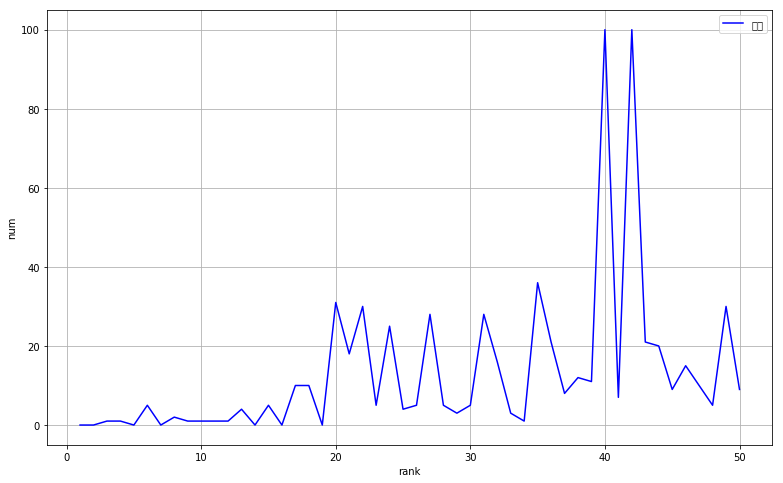

In [49]:
plt.figure(figsize=(13,8))
plt.plot(df['순위'], df['등락'],color='blue',markersize=12)
plt.grid()
plt.legend()
plt.xlabel('rank')
plt.ylabel('num')
plt.show()

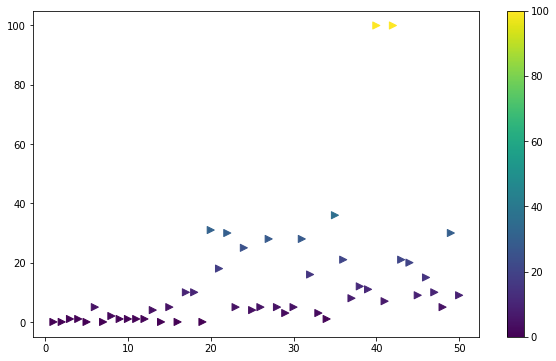

In [50]:
colormap = df['등락']

plt.figure(figsize=(10,6))
plt.scatter(df['순위'], df['등락'], s=50, c=colormap, marker='>')
plt.colorbar()
plt.show()